In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import mlgrad.pca as pca
import pandas as pd
import sklearn.datasets as datasets
import sklearn.decomposition as decomposition

In [150]:
df = pd.read_csv("data/hygdata_v3-abridged.csv", sep=',', usecols=['ci','mag'])
df.dropna(inplace=True)
print(df.columns)
df

Index(['mag', 'ci'], dtype='object')


,mag,ci
76189,6.51,1.200
107312,8.32,0.884
62985,10.36,0.753
114671,8.81,1.077
51601,7.12,1.450
...,...,...
119603,13.01,1.500
119607,11.72,1.540
119610,16.10,1.870
119611,12.82,1.640


In [159]:
ci = df['ci'].values
mag = df['mag'].values
iii = mag > 0
mag = mag[iii]
ci = ci[iii]
T = np.log(4600 * (10.92/(ci+1.7)+10.92/(ci+0.62)))
X0 = np.c_[T, mag]


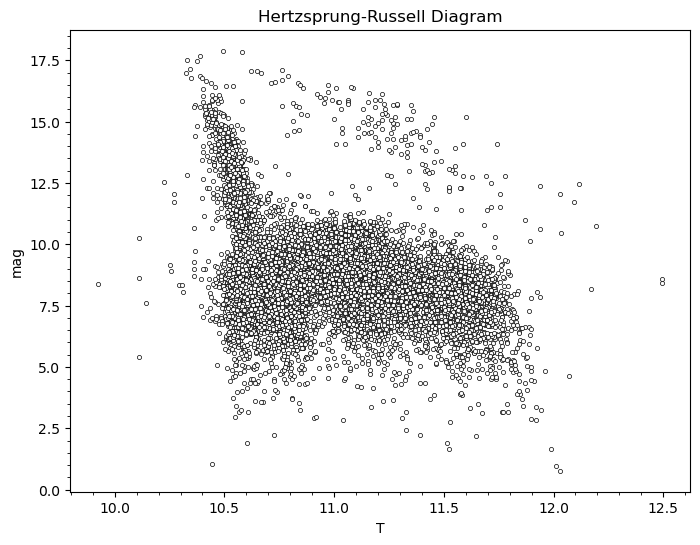

In [160]:
plt.figure(figsize=(8,6))
plt.scatter(T, mag, s=9, c='w', edgecolors='k', linewidth=0.5)
plt.ylabel('mag')
plt.xlabel('T')
plt.title('Hertzsprung-Russell Diagram')
plt.minorticks_on()
plt.show()

In [29]:
pca_sk = decomposition.PCA()
pca_sk = pca_sk.fit(X0)

In [30]:
sk_cs = pca_sk.components_
sk_c0 = pca_sk.mean_
sk_a1 = sk_cs[0,:]
sk_a2 = sk_cs[1,:]

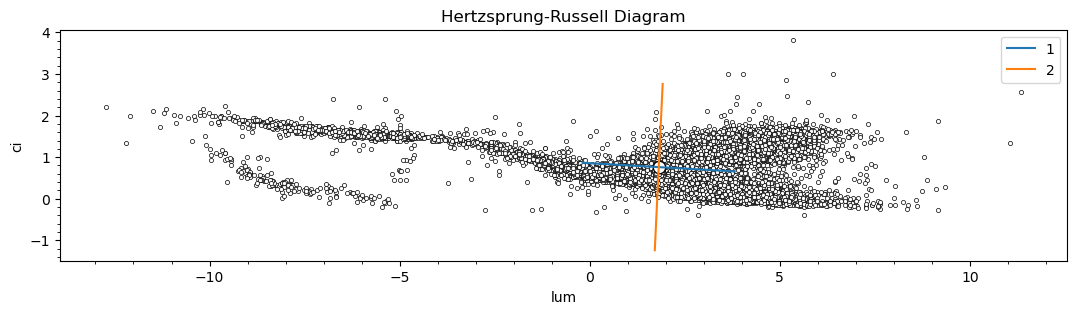

In [32]:
plt.figure(figsize=(13,3))
plt.scatter(lum, ci, s=9, c='w', edgecolors='k', linewidth=0.5)
plt.ylabel('ci')
plt.xlabel('lum')
plt.scatter([sk_c0[0]], [sk_c0[1]], s=81, c='w', edgecolors='k')
plt.plot([sk_c0[0]-2*sk_a1[0], sk_c0[0]+2*sk_a1[0]], [sk_c0[1]-2*sk_a1[1], sk_c0[1]+2*sk_a1[1]], label='1')
plt.plot([sk_c0[0]-2*sk_a2[0], sk_c0[0]+2*sk_a2[0]], [sk_c0[1]-2*sk_a2[1], sk_c0[1]+2*sk_a2[1]], label='2')
plt.title('Hertzsprung-Russell Diagram')
plt.minorticks_on()
plt.legend()
plt.show()

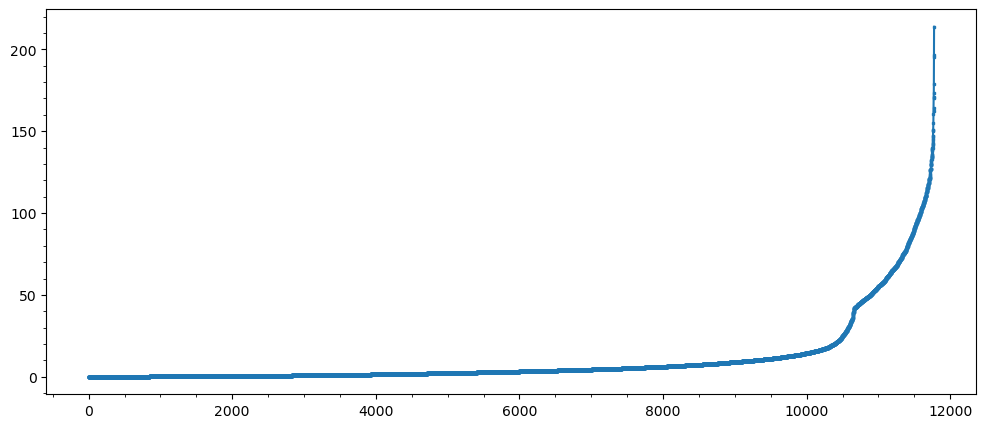

[1.81506922 0.76065376]


In [101]:
c0 = pca.find_center(X0)
plt.figure(figsize=(12,5))
plt.plot(sorted(pca.distance_center(X0, c0)), marker='s', markersize=2)
plt.minorticks_on()
plt.show()
print(c0)

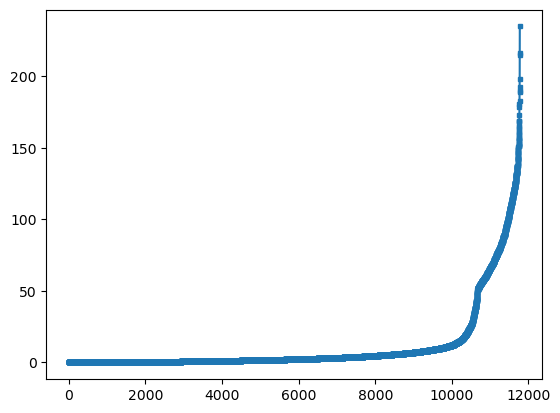

[2.50528748 0.60675165]


In [113]:
# N = len(X0)
# alpha = (N - 8) / N
# print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.001), alpha=0.5)
c = pca.find_rob_center(X0, wma)
plt.plot(sorted(pca.distance_center(X0, c)), marker='s', markersize=3)
plt.show()
print(c)

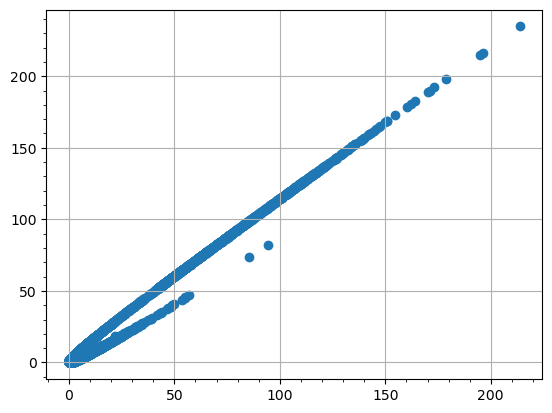

In [114]:
D0 = pca.distance_center(X0, c0)
D1 = pca.distance_center(X0, c)
plt.scatter(D0, D1)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [115]:
X1 = X0 - c
X1_0 = X0 - c0

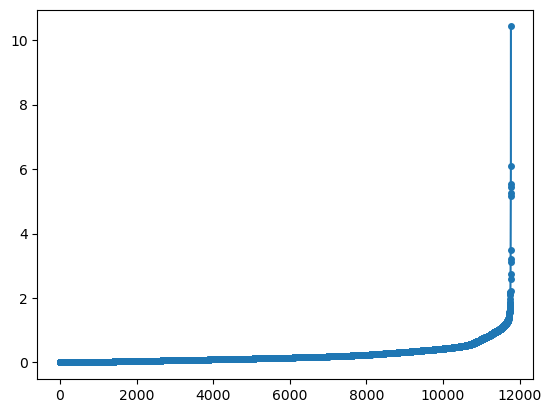

10.833342768266483 [ 0.99865182 -0.05190901]


In [116]:
a1_0, L1_0 = pca.find_pc(X1_0)
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='o', markersize=4)
plt.show()
print(L1_0, a1_0)

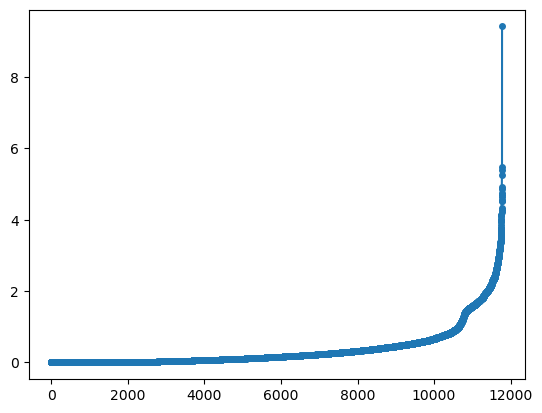

4.609634415583123 [0.99894259 0.04597509]


In [117]:
# N = len(X0)
# alpha = (N - 12) / N
# print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.001), alpha=0.5)
a1, L1 = pca.find_rob_pc(X1, wma)
plt.plot(sorted(pca.distance_line(X1, a1)), marker='o', markersize=4)
plt.show()
print(L1, a1)
U1 = pca.project_line(X1, a1)
U1_0 = pca.project_line(X1_0, a1_0)

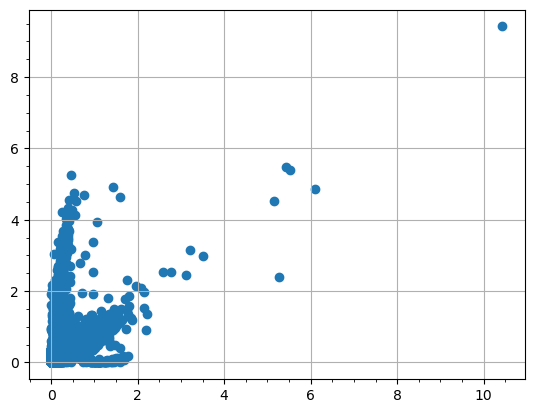

In [118]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [119]:
X2 = pca.project(X1, a1)
X2_0 = pca.project(X1_0, a1_0)

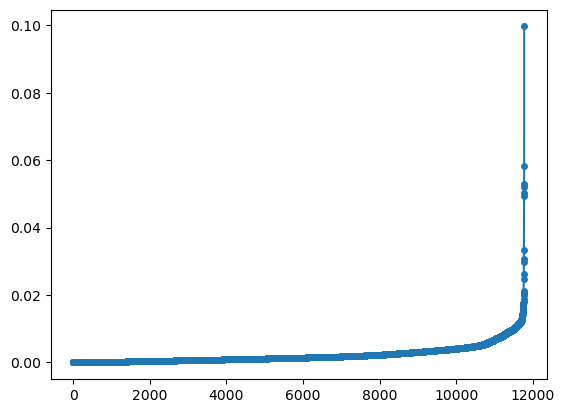

0.3742568956599107 [-0.04597509  0.99894259]


In [120]:
a2_0, L2_0 = pca.find_pc(X2)
plt.plot(sorted(pca.distance_line(X2_0, a2_0)), marker='o', markersize=4)
plt.show()
print(L2_0, a2_0)

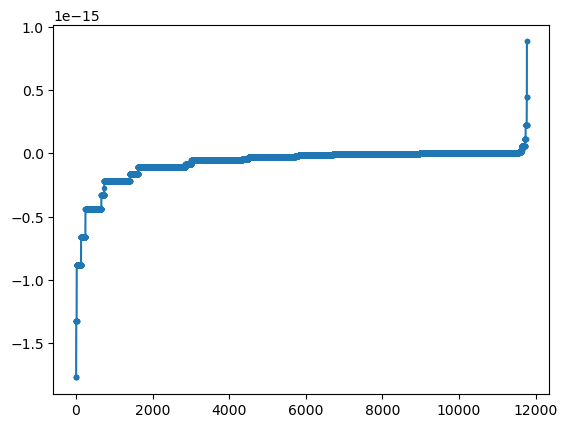

0.00948411510665247 [-0.04597509  0.99894259]


In [121]:
# N = len(X0)
# alpha = (N - 10) / N
# print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.001), alpha=0.51)
a2, L2 = pca.find_rob_pc(X2, wma)
plt.plot(sorted(pca.distance_line(X2, a2)), marker='o', markersize=3)
plt.show()
print(L2, a2)
U2 = pca.project_line(X2, a2)
U2_0 = pca.project_line(X2_0, a2_0)

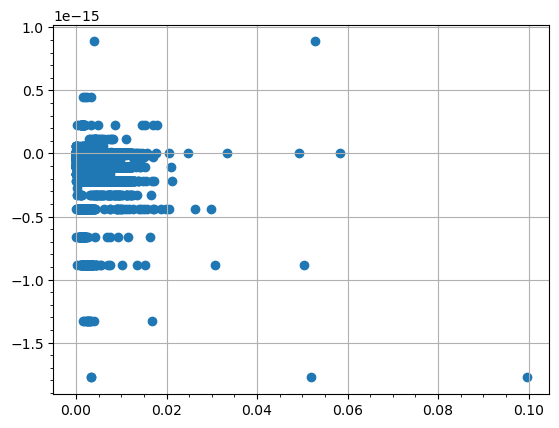

In [122]:
plt.scatter(pca.distance_line(X2_0, a2_0), pca.distance_line(X2, a2))
plt.minorticks_on()
plt.grid(1)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


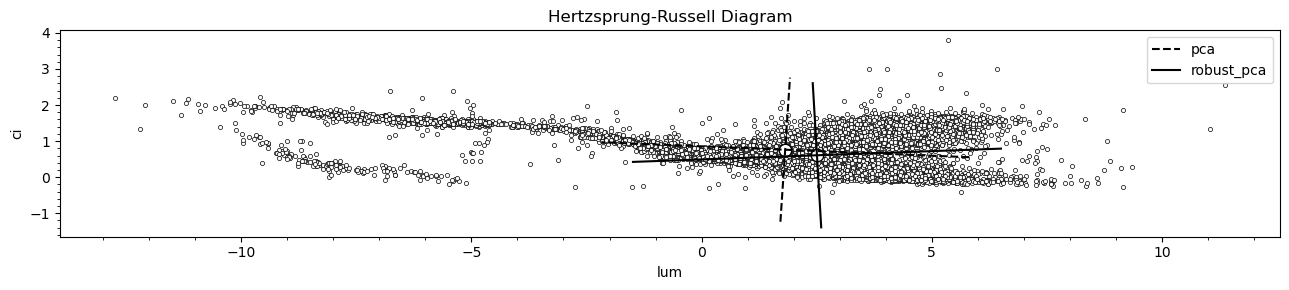

In [123]:
plt.figure(figsize=(13,3))
plt.scatter(lum, ci, s=9, c='w', edgecolors='k', linewidth=0.5)
plt.scatter([sk_c0[0]], [sk_c0[1]], s=81, c='w', edgecolors='k')
plt.scatter([c[0]], c[[1]], s=81, c='w', edgecolors='k')
plt.plot([sk_c0[0]-4*sk_a1[0], sk_c0[0]+4*sk_a1[0]], [sk_c0[1]-4*sk_a1[1], sk_c0[1]+4*sk_a1[1]], 
         label='pca', linestyle='--', c='k')
plt.plot([sk_c0[0]-2*sk_a2[0], sk_c0[0]+2*sk_a2[0]], [sk_c0[1]-2*sk_a2[1], sk_c0[1]+2*sk_a2[1]],
        linestyle='--', c='k')
plt.plot([c[0]-4*a1[0], c[0]+4*a1[0]], [c[1]-4*a1[1], c[1]+4*a1[1]], 
         label='robust_pca', linestyle='-', c='k')
plt.plot([c[0]-2*a2[0], c[0]+2*a2[0]], [c[1]-2*a2[1], c[1]+2*a2[1]],
        linestyle='-', c='k')
plt.xlabel('lum')
plt.ylabel('ci')
plt.title('Hertzsprung-Russell Diagram')
plt.minorticks_on()
plt.legend()
plt.tight_layout()
plt.savefig('robust_pca_hygdata.eps')
plt.show()

In [124]:
print(c0, c)

[1.81506922 0.76065376] [2.50528748 0.60675165]


In [125]:
print(a1_0, a2_0)
print(a1, a2)

[ 0.99865182 -0.05190901] [-0.04597509  0.99894259]
[0.99894259 0.04597509] [-0.04597509  0.99894259]
